# **"Evaluación del Riesgo Crediticio en Bancos Peruanos:  Un Enfoque No Supervisado con K-prototypes y Isolation Forest"**

# **Introducción**

El riesgo crediticio representa una de las principales preocupaciones del sector bancario y financiero, especialmente en mercados emergentes como el peruano, donde la morosidad puede ser un indicador crítico de la salud de las instituciones. Evaluar este riesgo requiere un análisis detallado del comportamiento de los clientes y su capacidad para cumplir con sus obligaciones financieras. En este contexto, las técnicas de aprendizaje automático no supervisado, como K-Prototypes, que permite identificar patrones y segmentar datos mixtos (numéricos y categóricos) mediante clustering, y Isolation Forest, reconocida por su eficacia en la detección de anomalías, se posicionan como herramientas prometedoras para descubrir patrones ocultos y detectar irregularidades en los datos crediticios.

# **Metodología**

## 1. *Recopilación de Datos*

- *Limpieza de Datos*:  Se eliminaron valores nulos del dataset data.csv, que contiene variables como mora, atraso, ingreso, deuda_sf, ede, score, vivienda, zona, y nivel_educ.
- *Estandarización*: Las variables numéricas (mora, atraso, ingreso, deuda_sf, edad, score) fueron estandarizadas (media 0, desviación estandar 1) para garantizar que todas tengan la misma escala durante el clustering y la visualización.
- *Codificación*: Las variables categóricas (vivienda, zona, nivel_educ) se mantuvieron como están, ya que K-Prototypes puede manejarlas directamente.

## 2. *Segmentación con K-prototypes*:

- Se utilizó el algoritmo K-prototypes, que combina K-means (para variables numéricas) y K-modes (para variables categóricas), para segmentar los clientes en 3 clusters.
- Parámetros: n_clusters= 3, inicialización Cao, random_state= 42.
- Resultados: Se obtuvieron 3 clusters con características distintas, lo que permite identificar grupos de clientes con comportamientos similares en términos de riesgo crediticio.

## 3. *Detección de Anomalías con Isolation Forest*:

- Se aplicó el algoritmo Isolation Forest para  identificar clientes atípicos que podrían representar riesgos extremos o detectar anomalías en los datos crediticios.
- Parámetros: contamination= 0.05 (se asumió que el 5% de los datos podrían ser anómalos), random_state= 42.
- Resultados: Se generó una columna anomalý (1 para anomalias, -1 para datos normales), y se calcularon estadísticas descriptivas para cada cluster, lo que permitió identificar patrones de riesgo y anomalías en algunos clientes mostrando una media de 61.19% en mora y 8.86 días de atraso).

## 4. *Visualización con FAMD*:

- Se utilizó el método FAMD (Factor Analysis of Mixed Data) para reducir la dimensionalidad de los datos y facilitar la visualización de los clusters y las anomalías.
- Parámetros: n_components= 2.
- Se calcularon las contribuciones de las variables a los componentes principales para interpretar los ejes del gráfico de dispersión:
    - Componente 0 (eje X): Dominado por ingreso (5.42%), linea_sf (5.61%) y cluster (8.33%).
    - Componente 1 (eje Y): Dominado por atraso (5.71%) y cluster (7.98%).

## **Resultados**

# 1. *Análisis de Clusters*:

Los clusters se ordenaron según mora (probabilidad de incumplimiento) para clasificarlos por nivel de riesgo. A continuación, se presentan las descripciones de cada cluster:

- Cluster 0: Alto Riesgo
    -  Mora: 0.77 (77% de los clientes en mora)
    -  Atraso: 3.7 días (promedio)
    -  Ingreso: Bajo (-0.42 desviaciones estándar)
    -  Deuda_sf: Baja (-0.21 desviaciones estándar)
    -  Edad: Jovenes (-0.56 desviaciones estándar)
    -  Score: Bajo (-0.57 desviaciones estándar)
    -  Vivienda: FAMILIAR
    -  Zona: Lima
    -  Nivel educativo: TECNICA
    -  Perfil: Clientes jóvenes con ingresos bajos, deuda baja, score bajo, vivienda familiar, nivel 
       educativo técnico y residenciados en Lima.
    Implicación: Restringir préstamos o exigir garantías

- Cluster 2: Riesgo Moderado
    -  Mora: 0.65 (65.45% de los clientes en mora)
    -  Atraso: 5.6 días (promedio)
    -  Ingreso: Promedio (0.07 desviaciones estándar)
    -  Deuda_sf: Promedio (-0.16 desviaciones estándar)
    -  Edad: Adultos (0.57 desviaciones estándar)
    -  Score: Alto (0.56 desviaciones estándar)
    -  Vivienda: FAMILIAR
    -  Zona: Lima
    -  Nivel educativo: UNIVERSITARIA
    -  Perfil: Clientes adultos con ingresos promedio, deuda promedio, score alto, vivienda 
       familiar, nivel educativo universitario y residenciados en Lima.
    Implicación: Evaluar con condiciones estándar
        
- Cluster 1: Bajo Riesgo
    -  Mora: 0.53 (52.55% de los clientes en mora)
    -  Atraso: 3.9 días (promedio)
    -  Ingreso: Alto (1.94 desviaciones estándar)
    -  Deuda_sf: Alta (1.69 desviaciones estándar)
    -  Edad: Adultos (0.79 desviaciones estándar)
    -  Score: Alto ( 0.88 desviaciones estándar)
    -  Vivienda: PROPIA
    -  Zona: Lima
    -  Nivel educativo: UNIVERSITARIA
    -  Perfil: Clientes adultos con ingresos altos, deuda alta, score alto, vivienda propia, nivel educativo universitario y residenciados en Lima.       
    Implicación: Ofrecer condiciones favorables

# 2. *Análisis de Anomalías*:

- Las anomalías tienen una media de 61.19% en mora, 8.86 días de atraso promedio (máximo 245 
  días), ingresos altos (2.14 desviaciones estándar), y deuda alta (2.18 desviaciones estándar).
- Estas características sugieren que las anomalías podrían ser clientes con perfiles extremos 
  (ingresos y deudas altas) que requieren revisión manual para descartar posibles fraudes o errores.

# 3. *Visualización con FAMD*:

- El eje X (Componente 0) separa a los clientes por ingresos y línea de crédito, con el cluster 
  1 (ingresos altos) a la derecha y el cluster 0 (ingresos bajos) a la izquierda.
- El eje Y (Componente 1) refleja diferencias en atraso, con el cluster 2 (mayor atraso) 
  separado verticalmente.
- Las anomalias, marcadas con "X" roja, tienden a la derecha (ingresos y deudas extremas) y a los 
  bordes del eje Y (atrasos extremos).
- La visualización permite identificar rápidamente los clusters y las anomalías, facilitando la 
  interpretación de los resultados.

# 4. *Gráfico de Hallazgos Clave*:

- Un gráfico de barras comparativo muestra mora, atraso, ingreso, dueda_sf, edad y score por cluster, 
  destacando las diferencias entre ellos.

## **Conclusiones**

Este proyecto proporciona una segmentación clara de los clientes bancarios peruanos según su riesgo crediticio, identificando tres grupos con características y niveles de riesgo distintos:

- Cluster 0 (Alto Riesgo): Jóvenes con ingresos bajos, score bajo, y vivienda familiar deben ser restringidos en préstamos o requerir garantías sólidas debido a su alta mora (77%).
- Cluster 1 (Bajo Riesgo): Adultos con ingresos altos, score alto, y vivienda propia pueden recibir condiciones favorables en préstamos, a pesar de su alta deuda, ya que tienen una mora baja (52.55%).
- Cluster 2 (Riesgo Moderado): Adultos con ingresos y score promedio, pero con un 65.45% de mora, y un atraso elevado (5.6 días) requieren evaluación cuidadosa antes de otorgar préstamos.

Las anomalías, con ingresos y deudas extremas, deben revisarse manualmente para identificar fraudes o errores. La visualización con FAMD confirma las diferencias entre clusters, destacando el rol de los ingresos y el atraso en la segmentación.  Este análisis permite a los bancos optimizar la aprobación de préstamos, minimizando el riesgo de incumplimientos y maximizando las oportunidades con clientes confiables.

# **Código Comentado**

A continuación se presenta el código utilizado para llevar a cabo el análisis de riesgo crediticio, incluyendo la segmentación con K-prototypes, la detección de anomalías con Isolation Forest y la visualización con FAMD:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from kmodes.kprototypes import KPrototypes
from prince import FAMD
import prince

In [2]:
# Load dataset
credit_risk = pd.read_csv('data.csv')

In [3]:
# Preprocess the data
credit_risk.head()

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA


In [4]:
# Check for null values
print(credit_risk.isnull().sum())

mora               0
atraso             0
vivienda           0
edad               0
dias_lab           0
exp_sf          1830
nivel_ahorro       0
ingreso            0
linea_sf        1127
deuda_sf         461
score              0
zona               0
clasif_sbs         0
nivel_educ         0
dtype: int64


In [5]:
# Impute missing values ​​with 0
credit_risk[['exp_sf', 'linea_sf', 'deuda_sf']] = credit_risk[['exp_sf', 'linea_sf', 'deuda_sf']].fillna(0)

In [6]:
# Define numerical variables to standardize
num_cols = ['edad', 'dias_lab', 'exp_sf', 'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score', 'clasif_sbs']
# Define categorical variables
cat_cols = ['vivienda', 'zona', 'nivel_educ']

In [7]:
# Standardize numerical variables
scaler = StandardScaler()
credit_risk[num_cols] = scaler.fit_transform(credit_risk[num_cols])

In [8]:
# Select features for clustering (excluding default and late payment)
X = credit_risk.drop(['mora', 'atraso'], axis=1)

In [9]:
# Obtain indexes of categorical variables
cat_indices = [X.columns.get_loc(col) for col in cat_cols]

In [10]:
# Apply K-prototypes with 3 clusters
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_indices)

In [11]:
# Add clusters to the DataFrame
credit_risk['cluster'] = clusters

In [12]:
# Analyze clusters
cluster_analysis = credit_risk.groupby('cluster').agg({
    'mora': 'mean',
    'atraso': 'mean',
    'ingreso': 'mean',
    'deuda_sf': 'mean',
    'edad': 'mean',
    'score': 'mean',
    'vivienda': lambda x: x.mode()[0], # modo
    'zona': lambda x: x.mode()[0], # modo
    'nivel_educ': lambda x: x.mode()[0], # modo
}).reset_index()

print("Análisis de clusters:\n", cluster_analysis)

Análisis de clusters:
    cluster      mora    atraso   ingreso  deuda_sf      edad     score  \
0        0  0.773872  3.733046 -0.417852 -0.209927 -0.560920 -0.568373   
1        1  0.525565  3.889417  1.942573  1.688410  0.793584  0.877086   
2        2  0.654493  5.638615  0.066244 -0.156998  0.573418  0.561552   

   vivienda  zona     nivel_educ  
0  FAMILIAR  Lima        TECNICA  
1    PROPIA  Lima  UNIVERSITARIA  
2  FAMILIAR  Lima  UNIVERSITARIA  


In [29]:
# Sort clusters by default (from highest to lowest risk)
cluster_analysis_sorted = cluster_analysis.sort_values(by='mora', ascending=False)

# Assign risk levels based on the position in the default ranking
risk_labels = ['Alto Riesgo', 'Riesgo Moderado', 'Bajo Riesgo']
implicaciones = [
    'Restringir préstamos o exigir garantías',
    'Evaluar con condiciones estándar',
    'Ofrecer condiciones favorables'
]

for i, row in cluster_analysis_sorted.iterrows():
    print(f"- Cluster {int(row['cluster'])}: {risk_labels[i]}")
    print(f"    - Mora: {row['mora']:.2f} ({row['mora']*100:.2f}% de los clientes en mora)")
    print(f"    - Atraso: {row['atraso']:.1f} días (promedio)")
    print(f"    - Ingreso: {'Bajo' if row['ingreso'] < -0.2 else 'Alto' if row['ingreso'] > 0.2 else 'Promedio'} ({row['ingreso']:.2f} desviaciones estándar)")
    print(f"    - Deuda_sf: {'Alta' if row['deuda_sf'] > 0.2 else 'Baja' if row['deuda_sf'] < -0.2 else 'Promedio'} ({row['deuda_sf']:.2f} desviaciones estándar)")
    print(f"    - Edad: {'Jovenes' if row['edad'] < -0.2 else 'Adultos' if row['edad'] > 0.2 else 'Promedio'} ({row['edad']:.2f} desviaciones estándar)")
    print(f"    - Score: {'Bajo' if row['score'] < -0.2 else 'Alto' if row['score'] > 0.2 else 'Promedio'} ({row['score']:.2f} desviaciones estándar)")
    print(f"    - Vivienda: {row['vivienda']}")
    print(f"    - Zona: {row['zona']}")
    print(f"    - Nivel educativo: {row['nivel_educ']}")
    print(f"    - Perfil: Clientes {'jóvenes' if row['edad'] < -0.2 else 'adultos'} con ingresos {'bajos' if row['ingreso'] < -0.2 else 'altos' if row['ingreso'] > 0.2 else 'promedio'}, deuda {'baja' if row['deuda_sf'] < -0.2 else 'alta' if row['deuda_sf'] > 0.2 else 'promedio'}, score {'bajo' if row['score'] < -0.2 else 'alto' if row['score'] > 0.2 else 'promedio'}, vivienda {row['vivienda'].lower()}, nivel educativo {row['nivel_educ'].lower()} y residenciados en {row['zona']}.")
    print(f"    Implicación: {implicaciones[i]}")
    print("")

- Cluster 0: Alto Riesgo
    - Mora: 0.77 (77.39% de los clientes en mora)
    - Atraso: 3.7 días (promedio)
    - Ingreso: Bajo (-0.42 desviaciones estándar)
    - Deuda_sf: Baja (-0.21 desviaciones estándar)
    - Edad: Jovenes (-0.56 desviaciones estándar)
    - Score: Bajo (-0.57 desviaciones estándar)
    - Vivienda: FAMILIAR
    - Zona: Lima
    - Nivel educativo: TECNICA
    - Perfil: Clientes jóvenes con ingresos bajos, deuda baja, score bajo, vivienda familiar, nivel educativo tecnica y residenciados en Lima.
    Implicación: Restringir préstamos o exigir garantías

- Cluster 2: Bajo Riesgo
    - Mora: 0.65 (65.45% de los clientes en mora)
    - Atraso: 5.6 días (promedio)
    - Ingreso: Promedio (0.07 desviaciones estándar)
    - Deuda_sf: Promedio (-0.16 desviaciones estándar)
    - Edad: Adultos (0.57 desviaciones estándar)
    - Score: Alto (0.56 desviaciones estándar)
    - Vivienda: FAMILIAR
    - Zona: Lima
    - Nivel educativo: UNIVERSITARIA
    - Perfil: Clientes adu

In [14]:
# Select numerical variables for the model Isolation Forest
X_num = credit_risk[num_cols]

In [15]:
# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42) # 5% de anomalias
anomalies = iso_forest.fit_predict(X_num)

In [16]:
# Add anomaly labels
credit_risk['anomaly'] = anomalies

In [17]:
# Analyze anomalies
anomaly_analysis = credit_risk[credit_risk['anomaly'] == -1][['mora', 'atraso', 'edad', 'ingreso', 'deuda_sf', 'score']].describe()
print("Estadísticas de anomalías:\n", anomaly_analysis)

Estadísticas de anomalías:
              mora      atraso        edad     ingreso    deuda_sf       score
count  420.000000  420.000000  420.000000  420.000000  420.000000  420.000000
mean     0.611905    8.864286    1.118453    2.137379    2.183109    0.935367
std      0.487898   35.425651    1.127787    1.681341    2.012031    1.067106
min      0.000000    0.000000   -1.261971   -0.661558   -0.527187   -2.590159
25%      0.000000    0.000000    0.264718    0.773206    0.210987    0.275290
50%      1.000000    0.000000    1.078953    1.734683    1.901338    0.991652
75%      1.000000    2.000000    1.994967    3.530932    4.684542    1.708015
max      1.000000  245.000000    4.335891    4.779362    4.684542    3.550089


In [18]:
# Apply FAMD for visualization
famd = FAMD(n_components=2)
famd.fit(X)
X_famd = famd.transform(X)

In [19]:
# Check explained variance
print("Varianza explicada por cada componente:", famd.eigenvalues_ / sum(famd.eigenvalues_))
print("Varianza explicada acumulada:", np.cumsum(famd.eigenvalues_) / sum(famd.eigenvalues_))
print("Valores propios:", famd.eigenvalues_)

Varianza explicada por cada componente: [0.66406605 0.33593395]
Varianza explicada acumulada: [0.66406605 1.        ]
Valores propios: [3.61838333 1.83044715]


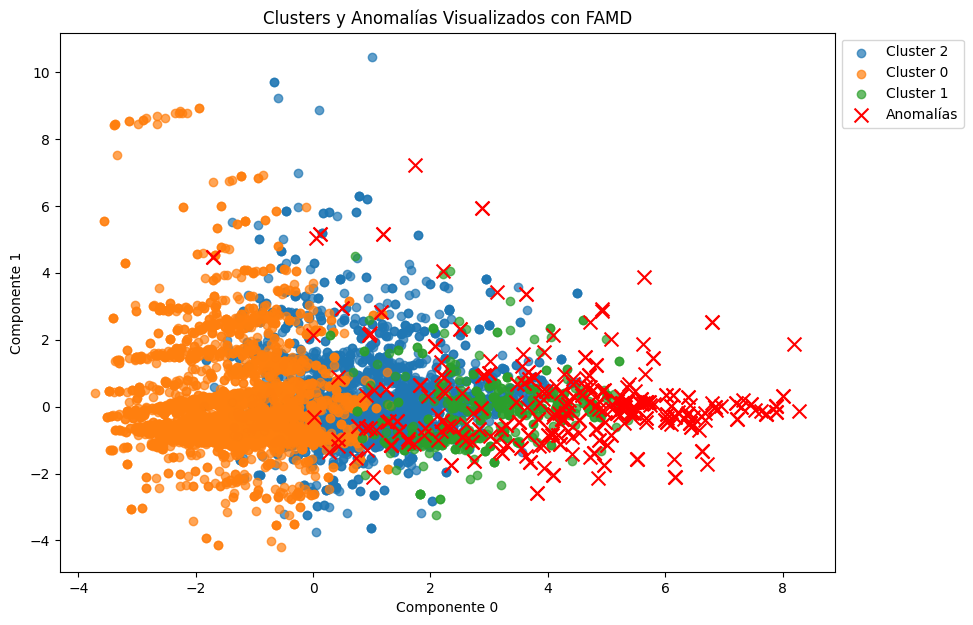

In [20]:
# Visualize the distribution of clusters and anomalies using a scatter plot.

plt.figure(figsize=(10, 7))
for cluster in credit_risk['cluster'].unique():
    mask = (credit_risk['cluster'] == cluster) & (credit_risk['anomaly'] == 1)
    plt.scatter(X_famd[mask][0], X_famd[mask][1], label=f'Cluster {cluster}', alpha=0.7)
anomaly_mask = credit_risk['anomaly'] == -1
plt.scatter(X_famd[anomaly_mask][0], X_famd[anomaly_mask][1], c='red', label='Anomalías', marker='x', s=100)
plt.title('Clusters y Anomalías Visualizados con FAMD')
plt.xlabel('Componente 0')
plt.ylabel('Componente 1')
plt.legend(bbox_to_anchor=(1.00, 1), loc=2, borderaxespad=0.5)
plt.show()

In [21]:
# Examine the correlation between the FAMD components and the Original Variables
famd = prince.FAMD(n_components=2).fit(credit_risk)
contributions = famd.column_contributions_
print("Contribuciones de las variables a los componentes:\n", contributions)

Contribuciones de las variables a los componentes:
 component            0             1
variable                            
edad          0.024749  8.814582e-03
dias_lab      0.017008  6.071704e-03
exp_sf        0.041640  1.469025e-03
nivel_ahorro  0.001819  9.682012e-07
ingreso       0.054113  3.502451e-03
linea_sf      0.055582  1.266808e-02
deuda_sf      0.023458  1.639491e-02
score         0.041157  2.258823e-02
clasif_sbs    0.001346  5.284049e-03
anomaly       0.048786  3.974725e-02
atraso        0.012222  5.025628e-02
cluster       0.082974  1.260381e-01
mora          0.011066  2.298583e-03
nivel_educ    0.031380  3.041247e-02
vivienda      0.016454  4.829811e-03
zona          0.008539  2.362768e-02


In [22]:
# Investigate anomalies individually
anomaly_analysis = credit_risk[credit_risk['anomaly'] == -1][['mora', 'atraso', 'edad', 'ingreso', 'deuda_sf', 'score']].describe()
print("Estadísticas de anomalías:\n", anomaly_analysis)

Estadísticas de anomalías:
              mora      atraso        edad     ingreso    deuda_sf       score
count  420.000000  420.000000  420.000000  420.000000  420.000000  420.000000
mean     0.611905    8.864286    1.118453    2.137379    2.183109    0.935367
std      0.487898   35.425651    1.127787    1.681341    2.012031    1.067106
min      0.000000    0.000000   -1.261971   -0.661558   -0.527187   -2.590159
25%      0.000000    0.000000    0.264718    0.773206    0.210987    0.275290
50%      1.000000    0.000000    1.078953    1.734683    1.901338    0.991652
75%      1.000000    2.000000    1.994967    3.530932    4.684542    1.708015
max      1.000000  245.000000    4.335891    4.779362    4.684542    3.550089


In [23]:
cluster_analysis_melted = cluster_analysis.reset_index().melt(id_vars='cluster', 
                                                            value_vars=['mora', 'atraso', 'ingreso', 'deuda_sf', 'edad', 'score'],
                                                            var_name='Variable', value_name='Valor')

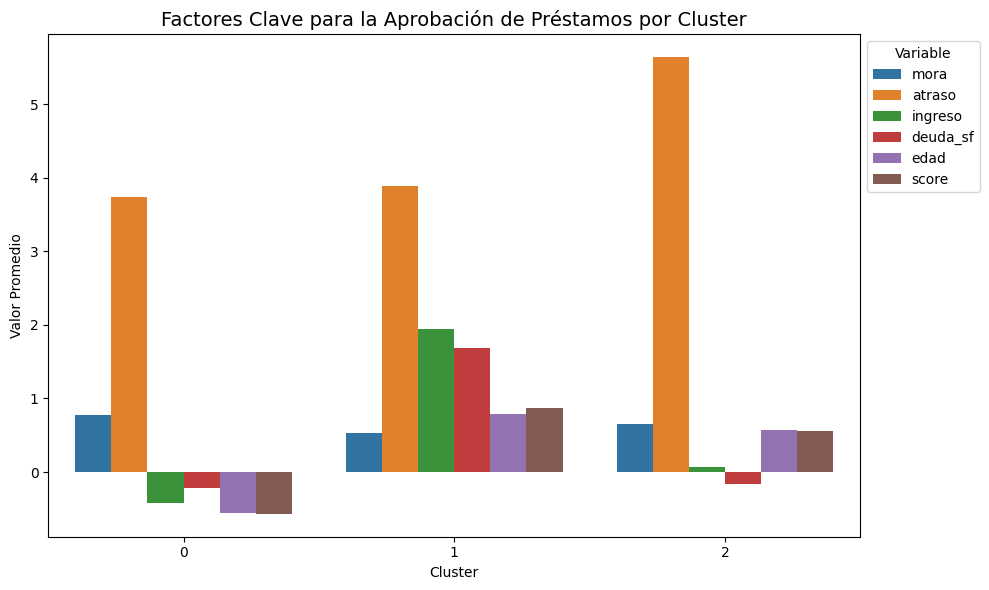

In [24]:
# Final Chart highlighting key findings for loan approval
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='Valor', hue='Variable', data=cluster_analysis_melted)
plt.title('Factores Clave para la Aprobación de Préstamos por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Valor Promedio', fontsize=10)
plt.legend(title='Variable', fontsize=10, bbox_to_anchor=(1.00, 1), loc=2)

plt.tight_layout()
plt.show()